In [9]:
# Dependencies
import numpy as np
import datetime as dt
import pandas as pd

# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [10]:
engine = create_engine("sqlite:///hawaii.sqlite")

# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(engine, reflect=True)

# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [11]:
# Create our session (link) from Python to the DB
session = Session(engine)

## D1: Determine the Summary Statistics for June

In [12]:
# Import the sqlalchemy extract function.
from sqlalchemy import extract

# 1. Write a query that filters the Measurement table to retrieve the temperatures for the month of June. 
jtemps = session.query(Measurement.date, Measurement.tobs).filter(extract('month',Measurement.date) ==6).all()

In [13]:
# 2. Convert the June temperatures to a list.
jtemps = list(jtemps)

In [14]:
# 3. Create a DataFrame from the list of temperatures for the month of June. 
jtemps_df = pd.DataFrame(jtemps,columns=['date','June Temps'])
jtemps_df.set_index(jtemps_df['date'], inplace=True)

In [16]:
# 4. Calculate and print out the summary statistics for the June temperature DataFrame.
jtemps_df.describe()

,June Temps
count,1700.000000
mean,74.944118
std,3.257417
min,64.000000
25%,73.000000
50%,75.000000
75%,77.000000
max,85.000000


In [ ]:
# 5. Return to your challenge instructions to compare your summary statistics

## D2: Determine the Summary Statistics for December

In [17]:
# 6. Write a query that filters the Measurement table to retrieve the temperatures for the month of December.
dtemps = session.query(Measurement.date, Measurement.tobs).filter(extract('month',Measurement.date) ==12).all()

In [18]:
# 7. Convert the December temperatures to a list.
dtemps = list(dtemps)

In [19]:
# 8. Create a DataFrame from the list of temperatures for the month of December. 
dtemps_df = pd.DataFrame(dtemps,columns=['date','December Temps'])
dtemps_df.set_index(dtemps_df['date'], inplace=True)

In [20]:
# 9. Calculate and print out the summary statistics for the Decemeber temperature DataFrame.
dtemps_df.describe()

,December Temps
count,1517.000000
mean,71.041529
std,3.745920
min,56.000000
25%,69.000000
50%,71.000000
75%,74.000000
max,83.000000


In [ ]:
# 10. Return to your challenge instructions to compare your summary statistics

<AxesSubplot:ylabel='Frequency'>

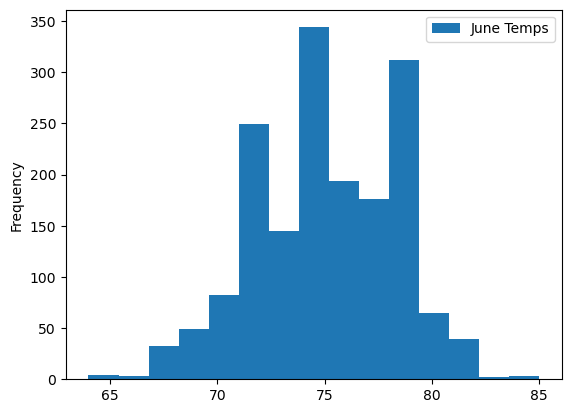

In [21]:
jtemps_df.plot.hist(bins=15)

<AxesSubplot:ylabel='Frequency'>

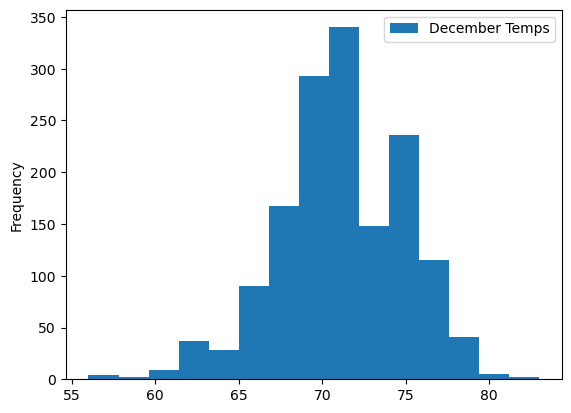

In [22]:
dtemps_df.plot.hist(bins=15)

In [26]:
janprcp_temp = session.query(Measurement.date, Measurement.prcp, Measurement.tobs).filter(extract('month',Measurement.date) ==1).all()
janprcp_temp=list(janprcp_temp)
janprcp_temp_df = pd.DataFrame(janprcp_temp,columns=['date','January Precip','January Temps'])
janprcp_temp_df.set_index(janprcp_temp_df['date'],inplace=True)
janprcp_temp_df.describe()

,January Precip,January Temps
count,1620.000000,1727.000000
mean,0.129975,68.726115
std,0.478062,4.367892
min,0.000000,54.000000
25%,0.000000,66.000000
50%,0.000000,69.000000
75%,0.050000,72.000000
max,8.810000,81.000000


In [25]:
octprcp_temp = session.query(Measurement.date, Measurement.prcp, Measurement.tobs).filter(extract('month',Measurement.date) ==10).all()
octprcp_temp=list(octprcp_temp)
octprcp_temp_df = pd.DataFrame(octprcp_temp,columns=['date','October Precip','October Temps'])
octprcp_temp_df.set_index(octprcp_temp_df['date'],inplace=True)
octprcp_temp_df.describe()

,October Precip,October Temps
count,1445.000000,1556.000000
mean,0.155606,75.391388
std,0.443684,3.545084
min,0.000000,64.000000
25%,0.000000,73.000000
50%,0.010000,76.000000
75%,0.090000,78.000000
max,4.470000,86.000000
